# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [5]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].count()
mouse_count

1893

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mouse_count = mouse_study["Mouse ID"].nunique()
unique_mouse_count

249

In [7]:
timepoint_mouse_count = mouse_study["Timepoint"].nunique()
timepoint_mouse_count

10

In [8]:
mouse_count_unique_timepoint = mouse_study.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)
mouse_count_unique_timepoint.head(20)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
q633      20           1
          25           1
q610      15           1
q597      45           1
q610      5            1
dtype: int64

In [9]:
mouse_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = mouse_study["Mouse ID"] == "g989"
mouse_study.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_study["Mouse ID"] != "g989"
mouse_study = mouse_study.loc[mask].reset_index(drop=True)
mouse_study.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_mean = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_median = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_variance = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_std = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_sem = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#mouse_drug_regime = mouse_study["Drug Regimen"]



In [14]:
mouse_stats_summary = pd.DataFrame({
    "Mean Tumor Volume": mouse_mean,
    "Median Tumor Volume": mouse_median,
    "Tumor Volume Variance": mouse_variance,
    "Tumor Volume Std Dev": mouse_std,
    "Tumor Volume Std Err": mouse_sem
})

#, index = mouse_drug_regime

In [15]:
mouse_stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_barchart = mouse_study["Drug Regimen"].value_counts()
pandas_barchart

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

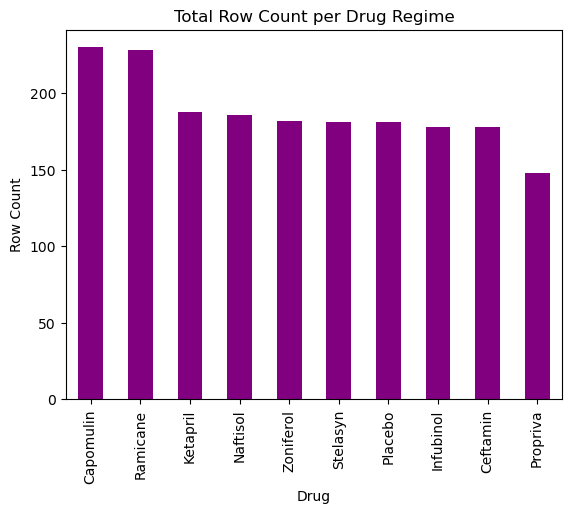

In [18]:
pandas_barchart.plot(kind="bar", xlabel="Drug", ylabel="Row Count", title="Total Row Count per Drug Regime", color={"purple"})
plt.show()

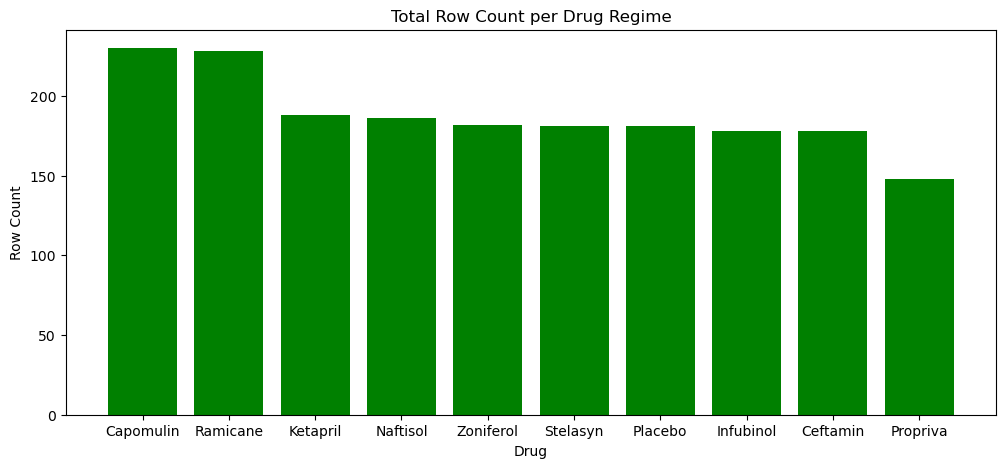

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(12, 5))
plt.bar(pandas_barchart.index, pandas_barchart, color="green")
plt.xlabel("Drug")
plt.ylabel("Row Count")
plt.title("Total Row Count per Drug Regime")
plt.show()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_piechart = mouse_study["Sex"].value_counts()
pandas_piechart

Sex
Male      958
Female    922
Name: count, dtype: int64

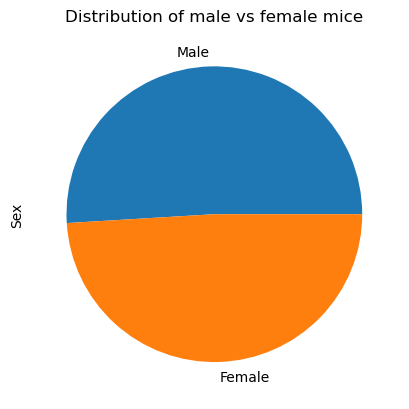

In [21]:
pandas_piechart.plot(kind="pie", title="Distribution of male vs female mice", ylabel="Sex")
plt.show()


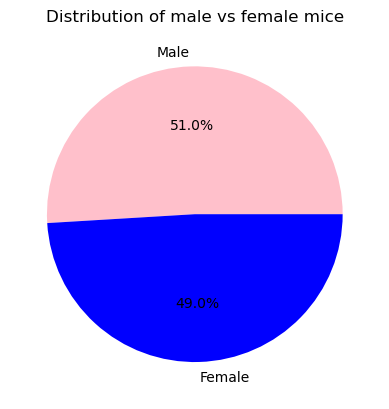

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pandas_piechart = mouse_study["Sex"].value_counts()
labels = ["Male", "Female"]
colors = ["pink", "blue"]
plt.title("Distribution of male vs female mice")

plt.pie(pandas_piechart, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#pandas_outliers = mouse_study["Drug Regimen"].value_counts()
#total_tumor_vol = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].value_counts()
#total_tumor_vol = mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["sum"]})
#total_tumor_vol


,Tumor Volume (mm3)
,sum
Drug Regimen,
Capomulin,9355.420462
Ceftamin,9361.228582
Infubinol,9413.493529
Ketapril,10384.299876
Naftisol,10105.671026
Placebo,9780.078122
Propriva,7743.497619
Ramicane,9169.417875


In [37]:
# Start by getting the last (greatest) timepoint for each mouse
#mouse_timepoints = mouse_study.groupby("Mouse ID").agg([max]).reset_index()
#mouse_timepoints
time_max = mouse_study.groupby("Mouse ID", as_index=False).Timepoint.max()
mouse_times = pd.merge(time_max, mouse_study, on=["Mouse ID", "Timepoint"], how="left")
mouse_times.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [36]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [41]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sub = mouse_times.loc[mouse_times["Drug Regimen"] == drug]
    
    # add subset 
    tumor_x = sub["Tumor Volume (mm3)"]
    tumors.append(tumor_x)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_x.quantile([0.25, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    outliers = tumor_x.loc[(tumor_x < lower_bound) | (tumor_x > upper_bound)]
    print(drug)
    print(outliers)


Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


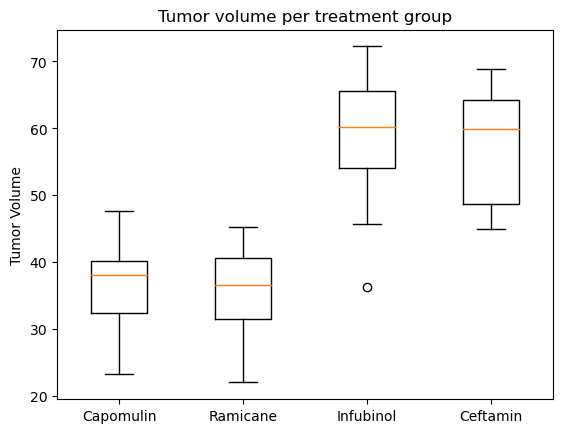

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumors, labels=drugs)
plt.title("Tumor volume per treatment group")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

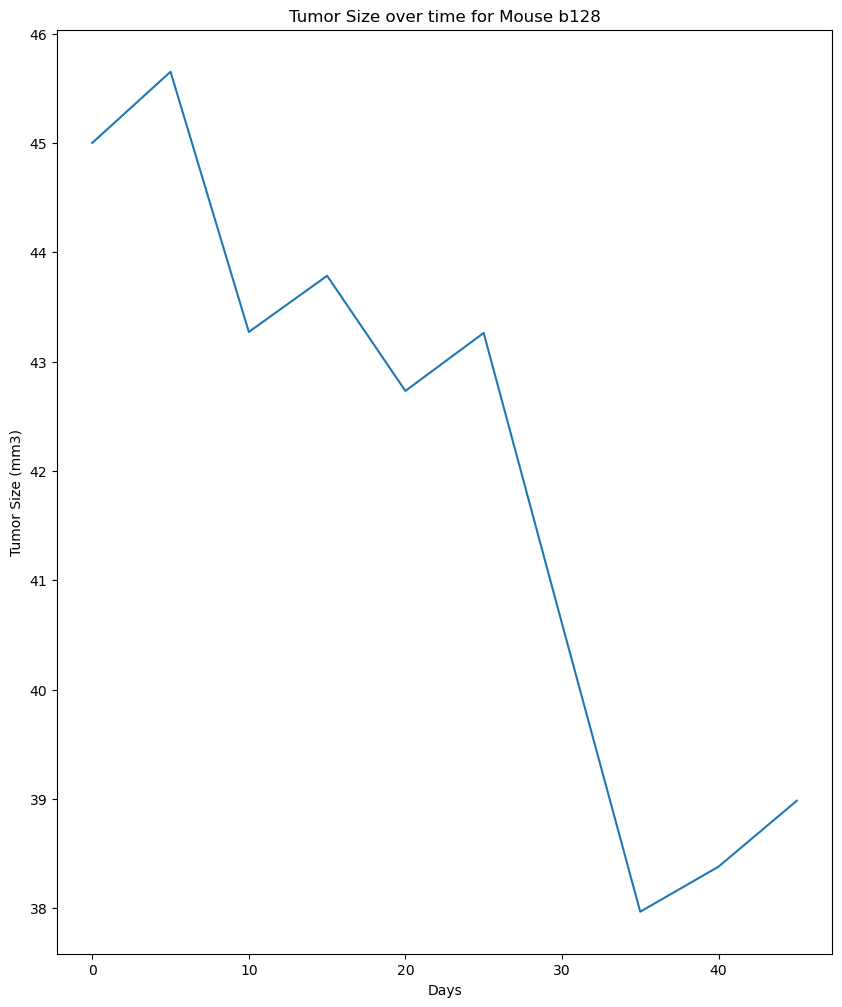

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
mouse = "b128"

mouse_c = mouse_study.loc[mouse_study["Mouse ID"] == mouse]

plt.figure(figsize=(10,12))
plt.plot(mouse_c.Timepoint, mouse_c["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Size (mm3)")
plt.title(f"Tumor Size over time for Mouse {mouse}")
plt.show()

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_c_scatterplot = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]

data = mouse_c_scatterplot.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
data.corr(method='Capomulin')

ValueError: could not convert string to float: 'b128'

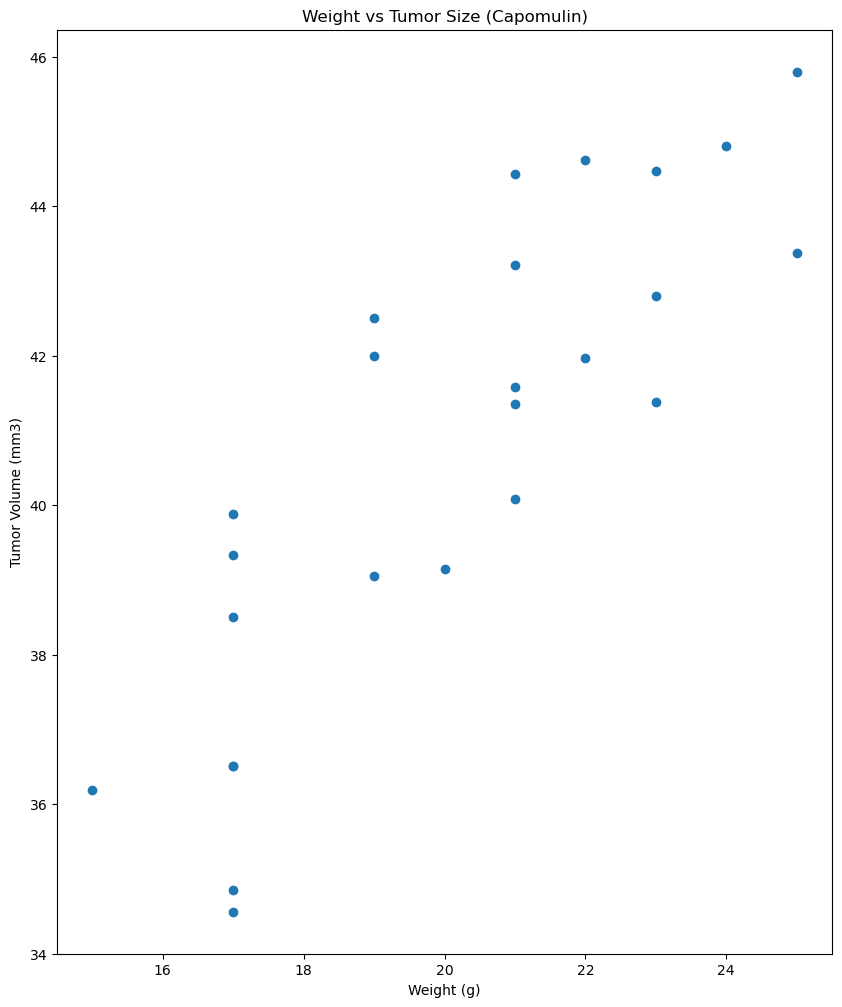

In [61]:
plt.figure(figsize=(10,12))
plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Size (Capomulin)")
plt.show()

## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [63]:
from scipy.stats import linregress

ValueError: could not convert string to float: 'b128'

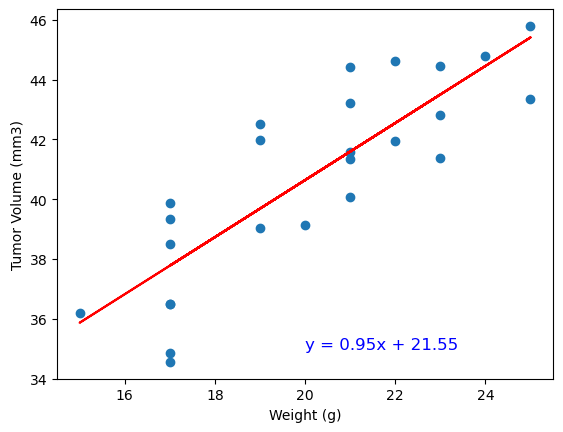

In [64]:
x_values = data["Weight (g)"]
y_values = data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 35),fontsize=12,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

corr = data.corr(method='Capomulin')["Weight (g)"]["Tumor Volume (mm3)"]
print(f"The correlation is {corr}")
print(f"The r-squared is: {rvalue**2}")
plt.show()